In [7]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
%graphics_toolkit ("gnuplot")
graphics_toolkit ("plotly")
clear
% load packages
pkg load statistics
warning off
% end of housekeeping

# Chemical speciation modelling

 Solving for the equilibrium position of a set of simultaneous reactions subject to the constraints of mass balance and mass action is a common problem in environmental modeling.
There exist many available computer programs to solve these types of chemical equilibrium
problems, examples include MINEQL (Allison et al., 1991) and PHREEQ (Saini-Eidukat
and Yahin, 1999). For engineering and scientific practices though these stand-alone pro-
grams are not necessarily completely useful. Often, engineers and scientists will use so-called high-level programming languages such as Matlab or Scilab to implement their larger scale problems. Problems such as reactive transport, or simulation of industrial scale processes can be “coded” into Matlab in a very flexible task-specific manner.

Many processes require the solution of simultaneous equilibria and thus the speciation
code presented here was developed for Matlab. In the researcher’s lab this code is used
to fit experimental data to chemical equilibrium binding constants for metal/organic and
metal/phosphate systems but with slight modifications the code could be embedded in Mat-
lab code for other applications (such as transport modeling).

The Matlab code was written based on the paper by (Carrayrou et al., 2002). An example calculation for the Fe(III) system in water is presented below.


### Iron (III) system

Mass balance and mass action for solving chemical equilibrium problems can all be represented in Tableau notation (Smith and Ferris, 2001; Morel and Hering, 1993). For a given defined system it is desirable to determine the equilibrium concentration of all species. Using the iron (III) system as an example a list of species of interest could include H+, OH – , Fe3+, FeOH2+, Fe(OH) +2 , and Fe(OH) –4 . There are other possible species but to keep the discussion simple these are the only ones included here. Also, for dilute solutions water can be assumed as a fixed component. The list includes six species so it is necessary to define six relationships in order to solve this system. The situation can be simplified if it is realized that each of these species are not independent. We can select components from the list of species and use those components to solve the equilibrium problem. For example, if we know H+ (pH) and Fe3+ we can determine the concentration of all other species from their logK values (mass action). In matrix notation we think of pH and Fe3+ as spanning the basis set.

Now we need two equations and two unknowns. First relation is mass balance of iron and
the second is proton balance (related to electroneutrality). Now we can write the tableau:


| H+ | Fe3+ | logK | species |
| --- | --- | --- | --- |
| 1 | 0 | 0 | H$^+$ |
| 0 | 1 | 0 | Fe$^{3+}$ |
| -1 | 0 | -14 | OH$^-$ |
| -1 | 1 | -2.19 | FeOH$^{2+}$ |
| -2 | 1 | -5.67 | Fe(OH)$_2^+$ |
| -4 | 1 | -21.6 | Fe(OH)$_4^-$ |
||||
| TOTH | FeT | |  |

Table 1 completely defines the equilibrium problem. The entries in the columns are the
stoichiometric coefficients required for formation of each species. For example, there is 1 H+ and 0 Fe3+ in H+. Also, Fe(OH) –4 is formed with one iron and removing 4 protons from
water. Given the tableau, all that remains is to determine the values for [H+] and [Fe3+] for specified TOTH and FeT. If you multiply across rows it is possible to determine species concentration and if you sum down columns the total values (mass balance) are recovered. This is best understood by writing out some entries:

\begin{align}
{[\mathrm{H}+]}&={[\mathrm{H}+]}^1\times{[\mathrm{Fe}^{3+}]}^0\times10^0\\
{[\mathrm{Fe}^{3+}]}&={[\mathrm{H}+]}^0\times{[\mathrm{Fe}^{3+}]}^1\times10^0\\
{[\mathrm{OH}^-]}&={[\mathrm{H}+]}^{-1}\times{[\mathrm{Fe}^{3+}]}^0\times10^{-14} \label{eqn:Kw}\\
{[\mathrm{FeOH}^{2+}]}&={[\mathrm{H}+]}^{-1}\times{[\mathrm{Fe}^{3+}]}^1\times10^{-2.19} \label{eqn:KH1}\\
&\text{....}
\end{align}

If equation Kw is rearranged to solve for $\mathrm{[OH-]}$ then the equation above for [OH-] s obtained.  As another example, to understand equation formation of FeOH given above, consider that $K_{H1}$ for the first hydrolysis of iron (III) corresponds to the following reaction:

\begin{equation}
\mathrm{Fe^{3+}} + \mathrm{H_2O} \rightleftharpoons \mathrm{FeOH^{2+}} + \mathrm{H+} \quad K_{H1} = \dfrac{\mathrm{[FeOH^{2+}]}\mathrm{[H+]}}{\mathrm{[Fe^{3+}]}} 
\end{equation}

if K is rearranged to solve for $\mathrm{[FeOH^{2+}]}$ then the equation $\mathrm{[FeOH^{2+}]}={[\mathrm{H}+]}^{-1}\times{[\mathrm{Fe}^{3+}]}^1\times10^{-2.19}$  is obtained.  To explain how the summation down the columns is the mass balance.  Consider total iron ....

\begin{equation}
\mathrm{Fe_T}=0\mathrm{[H+]}+1\mathrm{[Fe^{3+}]}+0\mathrm{[OH^-]}+1\mathrm{[FeOH^{2+}]}+1\mathrm{[Fe(OH)2^+]}+1\mathrm{[Fe(OH)4^-]}
\end{equation}

notice that the coefficients are the entries down the iron column in the tableau.

The problem can easily be expressed in matrix notation.  We'll define the $1 \times 2$ vector of unknown component concentrations as $\mathbf{X}$ so we can write $\mathbf{X}=\bigl( \begin{smallmatrix}
\log\mathrm{[H+]} & \log\mathrm{[Fe^{3+}]} \end{smallmatrix} \bigr)$.  There is a $6 \times 1$ vector of species concentrations as well \begin{equation}
\mathbf{C}= \begin{pmatrix}     
\mathrm{[H+]} \\ 
\mathrm{[Fe^{3+}]} \\
\mathrm{[OH-]} \\ 
\mathrm{[FeOH^{2+}]} \\ 
\mathrm{[Fe(OH)2+]} \\ 
\mathrm{[Fe(OH)4-]}
\end{pmatrix}     \end{equation}

Total concentrations are in a $2\times 1$ vector $\mathbf{T} = \bigl( \begin{smallmatrix}
\text{TOTH} \\ \text{Fe}_{\mathrm{T}} \end{smallmatrix} \bigr)$.  The logK values are summarized in the $ 6\times 1$ vector
\begin{equation}
 \mathbf{K}=\begin{pmatrix}
0\\
0 \\
\log{K_w}\\
\log{K_{H1}} \\
 \log{K_{H2}}\\
  \log{K_{H4}}\\
   \end{pmatrix} \end{equation}

Finally, we need a $6 \times 2$ matrix of stoichiometric coefficients
\begin{equation}
\mathbf{A} = \begin{pmatrix} 1&0\\
0&1\\
-1 & 0\\
-1 & 1\\
-2 & 1\\
-4 & 1\\ 
 \end{pmatrix}
\end{equation}

Now the minimization problem is to determine $\mathbf{X}$ that minimizes the residuals in the mass balance.  This calculation is performed as follows:
\begin{align}
 \text{minimize $\mathbf{R}$ as a function of $\mathbf{X}$ where}\quad
 \mathbf{R}&=\mathbf{A}'\times(10^\mathbf{C})-\mathbf{T}\\
  \text{and} \quad      \mathbf{C}&=10^{(\mathbf{K}+\mathbf{A}\times\mathbf{X}')}
\end{align}

Minimization can be performed using all element of $\mathbf{R}$ using Newton-Raphson method for example or using other nonlinear optimization methods on some summation of $\mathbf{R}$ such as sum of squares or sum of absolute values of residuals (BrassardandBodurtha:2000).  In this case $\mathbf{R}$ would be a $2 \times 1$ vector of mass balance residuals.

To solve this here first we will add some functions.  One to return the "tableau" and one to adjust for fixed pH (for this example we calculate speciation versus pH, so pH will be fixed).  The third function below solves for the minimum in the difference between calculated and actual mass balance.  


In [8]:
function [KSOLUTION,ASOLUTION,SOLUTIONNAMES] = get_equilib_defn 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Tableau=[...
%H	  FeIII        logK            species
 1	  0	            0              {'H'}
 0	  1	            0              {'Fe'}
-1	  0	            -14            {'OH'}
-1    1             -2.19          {'FeOH'}
-2    1             -5.67          {'FeOH2'}
-4    1             -21.6          {'FeOH4'}
];

n=size(Tableau,2);
ASOLUTION=cell2mat(Tableau(:,1:n-2));
KSOLUTION=cell2mat(Tableau(:,n-1));
SOLUTIONNAMES=strvcat(Tableau(:,n));

end


In [9]:
% ----------- for fixed pH ----------------

function [Ksolution,Asolution]=get_equilib_fixed_pH(KSOLUTION,ASOLUTION,pH)

    [N,M]=size(ASOLUTION);
    Ksolution=KSOLUTION-ASOLUTION(:,1)*pH;
    Asolution=[ASOLUTION(:,2:M)];

end

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [10]:
%%file nl_massbalancerrnosolid_NR.m

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
function [X,F,J,C] = nl_massbalancerrnosolid_NR(X,Asolution,Ksolution,T)

[Nc,Nx]=size(Asolution); %Xsolution=X(1:Nx);
criteria=1e-15;

for i=1:1000

logC=(Ksolution)+Asolution*log10(X); C=10.^(logC); % calc species
R=Asolution'*C-T;

% Evaluate the Jacobian 
   z=zeros(Nx,Nx); 
for j=1:Nx 
	for k=1:Nx 
		for i=1:Nc; z(j,k)=z(j,k)+Asolution(i,j)*Asolution(i,k)*C(i)/X(k); end
   	end
end

J = z;

deltaX=z\(-1*R);
one_over_del=max([1, -1*deltaX'./(0.5*X')]);
del=1/one_over_del; X=X+del*deltaX;
    
tst=sum(abs(R));
if tst<=criteria; break; end

end

F=[R]; 

end


### make the graph

So for each pH we will solve the equilibrium problem.  First load the tableau, then modify for the pH of that iternation. Then solve.  Then store the results and loop.

At the end make a plot.
 

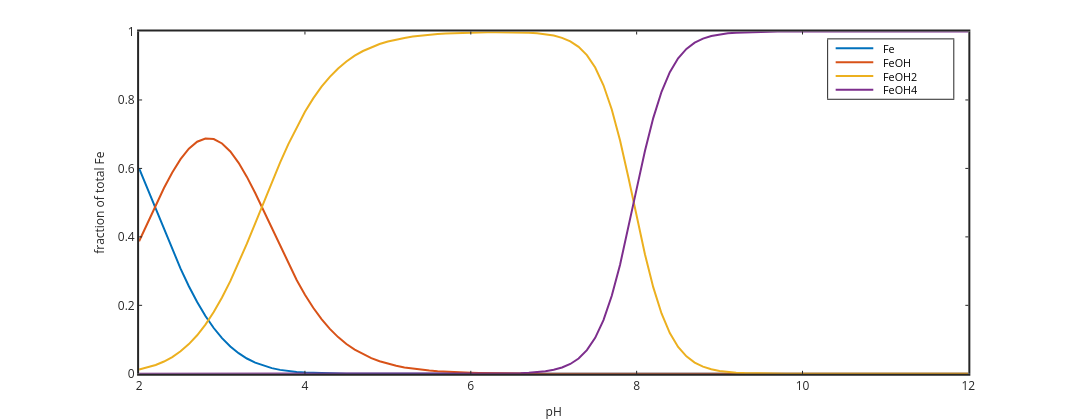

In [11]:
%plot -s 600,600 -f 'svg'

%define the equilibrium sytem (The tableau)
[KSOLUTION,ASOLUTION,SOLUTIONNAMES] = get_equilib_defn;
% initial guess (just Fe becasue pH is fixed)
Feguess=[-5.5]; guess=[10.^Feguess];

%set the pH range and total
pH=2:0.1:12; FeT=1e-4; T=[FeT];

%now for each pH solve
for i=1:length(pH)
% adjust for fixed pH
[Ksolution,Asolution]=get_equilib_fixed_pH(KSOLUTION,ASOLUTION,pH(i));
% calculate species using NR
[X,F,J,C] = nl_massbalancerrnosolid_NR(guess,Asolution,Ksolution,T);
species_summary(:,i)=C; err(i)=F;
end

for i=1:size(species_summary,1)
txt=[SOLUTIONNAMES(i,:),"=species_summary(i,:);"]; eval(txt);
end

h=plot(pH,Fe/T,pH,FeOH/T,pH,FeOH2/T,pH,FeOH4/T);
set(gca,"fontsize",12); set(h,'linewidth',2); set(gca,'linewidth',2);
h=xlabel('pH'); set(h,'fontsize',12); h=ylabel('fraction of total Fe'); set(h,'fontsize',12);
legend('Fe','FeOH','FeOH2','FeOH4','Location','northeast','Orientation','vertical');
axis([min(pH) max(pH) 0 1])



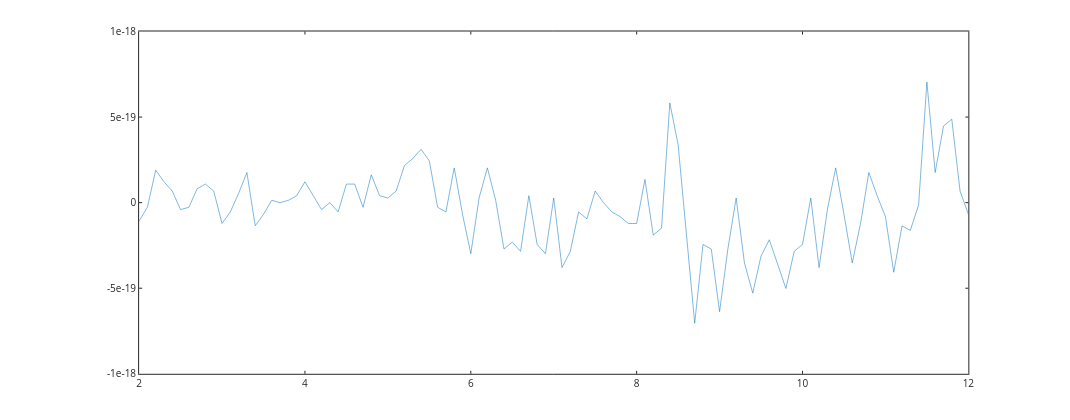

In [12]:
plot(pH,err)

### exercises 7

recalculate the speciation above but at 4e-5 M added salicylic acid, H2L (There is already 1e-4 M Fe(III).

Fe + L = FeL logK=17.55

pKa1=2.97 pKa2=13.7

plot species versus pH, and also a plot of the two mass balance errors versus pH.

for matrix dimensions to match, you will need to put totals in like this T=[FeT; LT];


